IMPORTING THE DEPENDENCIES

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

DATA COLLECTION AND PROCESSING

In [9]:
# Loading the data from csv file to pandas dataframe
Car_data = pd.read_csv("car data.csv")

In [11]:
# inspecting the first 5 rows of the dataframe
Car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
# inspecting the last 5 rows of the dataframe
Car_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [13]:
# checking the number of rows and columns
Car_data.shape

(301, 9)

In [15]:
# gettin information about the dataset

Car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [16]:
# Checking the number of missing values

Car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [19]:
# Checking the distribution of categorical data

print(Car_data.Fuel_Type.value_counts())
print(Car_data.Seller_Type.value_counts())
print(Car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


ENCODING THE CATEGORICAL DATA

In [25]:
# Encoding 'Fuel_Type' Column
Car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# Encoding 'Seller_Type' Column
Car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# Encoding 'Transmission' Column
Car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [26]:
Car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


SPLITTING THE DATA AND TARGET

In [30]:
X = Car_data.drop(['Car_Name','Selling_Price'],axis=1)
Y = Car_data['Selling_Price']

In [31]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [32]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


SPLITTING THE DATA INTO TRAINING DATA AND TESTING DATA

In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

MODEL CREATION

MODEL TRAINING

1.Linear regression

In [34]:
# Loading the linear regression model

lin_reg_model = LinearRegression()

In [35]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

MODEL EVALUATION

In [36]:
# Prediction on Training data

Training_data_prediction = lin_reg_model.predict(X_train)

In [39]:
# R Squared error

error_score = metrics.r2_score(Y_train,Training_data_prediction)
print('R squared Error: ', error_score)

R squared Error:  0.8741731316387884


VISUALIZE THE ACTUAL PRICES AND PREDICTED PRICES

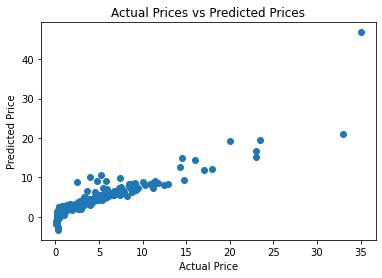

In [66]:
plt.scatter(Y_train, Training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [44]:
# Prediction on Training data

Testing_data_prediction = lin_reg_model.predict(X_test)

In [46]:
# R Squared error

error_score = metrics.r2_score(Y_test,Testing_data_prediction)
print('R squared Error: ', error_score)

R squared Error:  0.8650320546209178


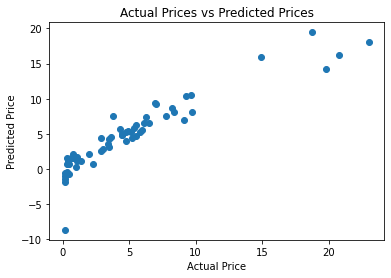

In [48]:
plt.scatter(Y_test, Testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

2.Lasso Regression

In [56]:
# Loading the lasso regression model

lass_reg_model = Lasso()

In [57]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

MODEL EVALUATION

In [59]:
# Prediction on Training data

Training_data_prediction = lass_reg_model.predict(X_train)

In [60]:
# R Squared error

error_score = metrics.r2_score(Y_train,Training_data_prediction)
print('R squared Error: ', error_score)

R squared Error:  0.8354940639023495


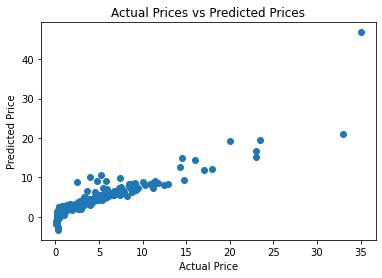

In [65]:
plt.scatter(Y_train, Training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [62]:
# Prediction on Training data

Testing_data_prediction = lass_reg_model.predict(X_test)

In [63]:
# R Squared error

error_score = metrics.r2_score(Y_test,Testing_data_prediction)
print('R squared Error: ', error_score)

R squared Error:  0.8072510341947781


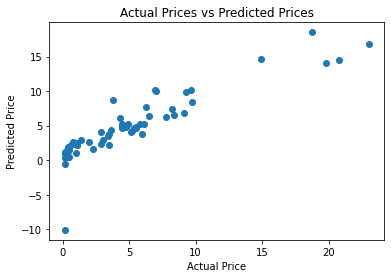

In [64]:
plt.scatter(Y_test, Testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()